# **1. Mount Google Drive**

In [1]:
# Mount google drive
#from google.colab import drive
#drive.mount('/content/drive')

#updated yet?

---
# **2. Import Libraries**

In [1]:
# Import pandas, numpy and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns',None)


C:\Users\rober\AppData\Local\Temp\ipykernel_14988\1726083202.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd




---


# **3. Import Files and data manipulation**

Files where imported as .txt fiels but here converted into Pandas library dataframe using pandas method `read_csv(path,sep=,header=None)`. The file was originaly .txt and read as a .csv file.



In [2]:
# Define the path to the SQLite database file
db_path = 'C:/Users/rober/SQLite/CyberSentryDB.db'

# Establish a connection to the database specified by db_path
conn = sql.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to select all records from the 'network_activity' table
# and store the result in a pandas DataFrame 'df' for further analysis
#df = pd.read_sql_query("SELECT * FROM network_activity", conn)
df_test = pd.read_sql_query("SELECT * FROM testing_data", conn)
df_train = pd.read_sql_query("SELECT * FROM training_data", conn)

# Close the cursor to release database resources
cursor.close()

# Close the connection to the database to ensure data integrity and release resources
conn.close()


## 3.1. **Visualize imported files**


*   Using `df.head()` method from the Pandas library to observe what the imported files first 5 rows look like.
*   Using `df.info()` method we can see the datafram and check if there are null values or missing data, that we later would have to correct and clean.



In [3]:
#df.head()
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.0,0.0,0.0,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.0,0.0,0.09,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21


In [4]:
#df.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     125973 non-null  object
 1   protocol_type                125973 non-null  object
 2   service                      125973 non-null  object
 3   flag                         125973 non-null  object
 4   src_bytes                    125973 non-null  object
 5   dst_bytes                    125973 non-null  object
 6   land                         125973 non-null  object
 7   wrong_fragment               125973 non-null  object
 8   urgent                       125973 non-null  object
 9   hot                          125973 non-null  object
 10  num_failed_logins            125973 non-null  object
 11  logged_in                    125973 non-null  object
 12  num_compromised              125973 non-null  object
 13  root_shell    

In [5]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.0,0.06,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,57,1.0,0.0,1.0,0.28,0.0,0.0,0.0,0.0,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.0,0.0,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   duration                     22544 non-null  object
 1   protocol_type                22544 non-null  object
 2   service                      22544 non-null  object
 3   flag                         22544 non-null  object
 4   src_bytes                    22544 non-null  object
 5   dst_bytes                    22544 non-null  object
 6   land                         22544 non-null  object
 7   wrong_fragment               22544 non-null  object
 8   urgent                       22544 non-null  object
 9   hot                          22544 non-null  object
 10  num_failed_logins            22544 non-null  object
 11  logged_in                    22544 non-null  object
 12  num_compromised              22544 non-null  object
 13  root_shell                   22

In [7]:

df_train.loc[df_train['outcome'] == "normal", "outcome"] = 'normal'
df_train.loc[df_train['outcome'] != 'normal', "outcome"] = 'attack'

df_test.loc[df_test['outcome'] == "normal", "outcome"] = 'normal'
df_test.loc[df_test['outcome'] != 'normal', "outcome"] = 'attack'

In [8]:
#df.head()
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.0,0.0,0.0,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.0,0.0,0.09,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21


In [9]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,attack,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.0,0.06,0.0,0.0,0.0,0.0,1.0,1.0,attack,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,57,1.0,0.0,1.0,0.28,0.0,0.0,0.0,0.0,attack,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.0,0.0,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,attack,11


In [10]:
# Concatenate dataframes
df_all = pd.concat([df_train, df_test], ignore_index=True)

# Optionally, if you want to drop the old index and not add it as a column
df_all = df_all.reset_index(drop=True)

df_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,attack,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.0,0.0,0.0,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.0,0.0,0.09,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,21


In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     148517 non-null  object
 1   protocol_type                148517 non-null  object
 2   service                      148517 non-null  object
 3   flag                         148517 non-null  object
 4   src_bytes                    148517 non-null  object
 5   dst_bytes                    148517 non-null  object
 6   land                         148517 non-null  object
 7   wrong_fragment               148517 non-null  object
 8   urgent                       148517 non-null  object
 9   hot                          148517 non-null  object
 10  num_failed_logins            148517 non-null  object
 11  logged_in                    148517 non-null  object
 12  num_compromised              148517 non-null  object
 13  root_shell    

In [18]:
def bar_plot(df, cols_list, rows, cols):
    # Create a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
    fig.tight_layout(pad=1.0)  # Add spacing between plots for clarity

    # Flatten the axes array and iterate over it along with the column names in cols_list.
    for ax, col in zip(axes.ravel(), cols_list):
        # Use Seaborn's countplot to create a bar chart.
        sns.countplot(x=col, data=df, ax=ax)

        # Calculate the total number of data points for the percentage calculation.
        total = len(df[col])

        # Iterate through the patches (bars) in the barplot to get their properties.
        for p in ax.patches:
            # Calculate the percentage and format it.
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            # Get the x and y coordinates to place the text.
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            # Place the text on the bar.
            ax.text(x, y, percentage, ha='center', va='bottom')

        # Set the title of the current subplot to the name of the column.
        ax.set_title(str(col), fontsize=12)

        # Rotate the x-axis labels for better readability.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Adjust the layout and display the figure with all the bar charts.
    plt.tight_layout()
    plt.show()


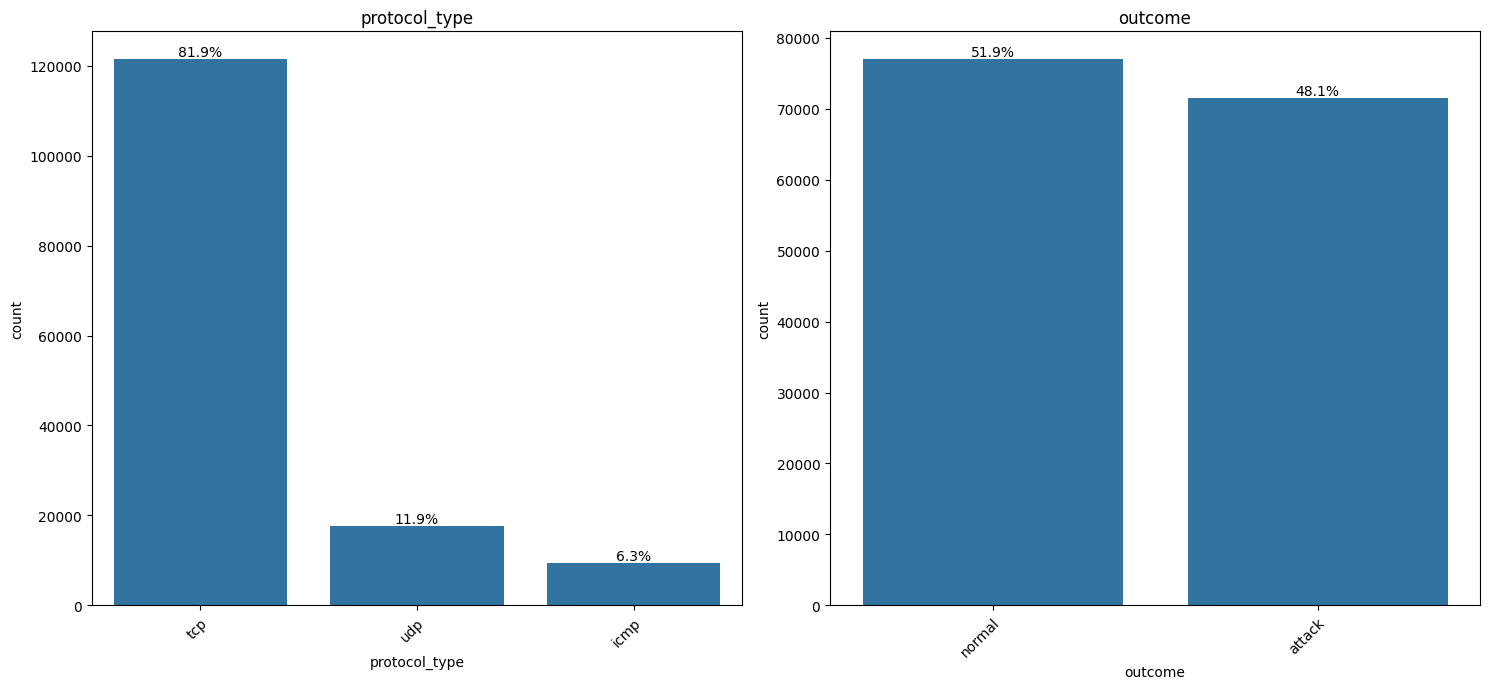

In [19]:
bar_plot(df_all, ['protocol_type', 'outcome'],1,2)

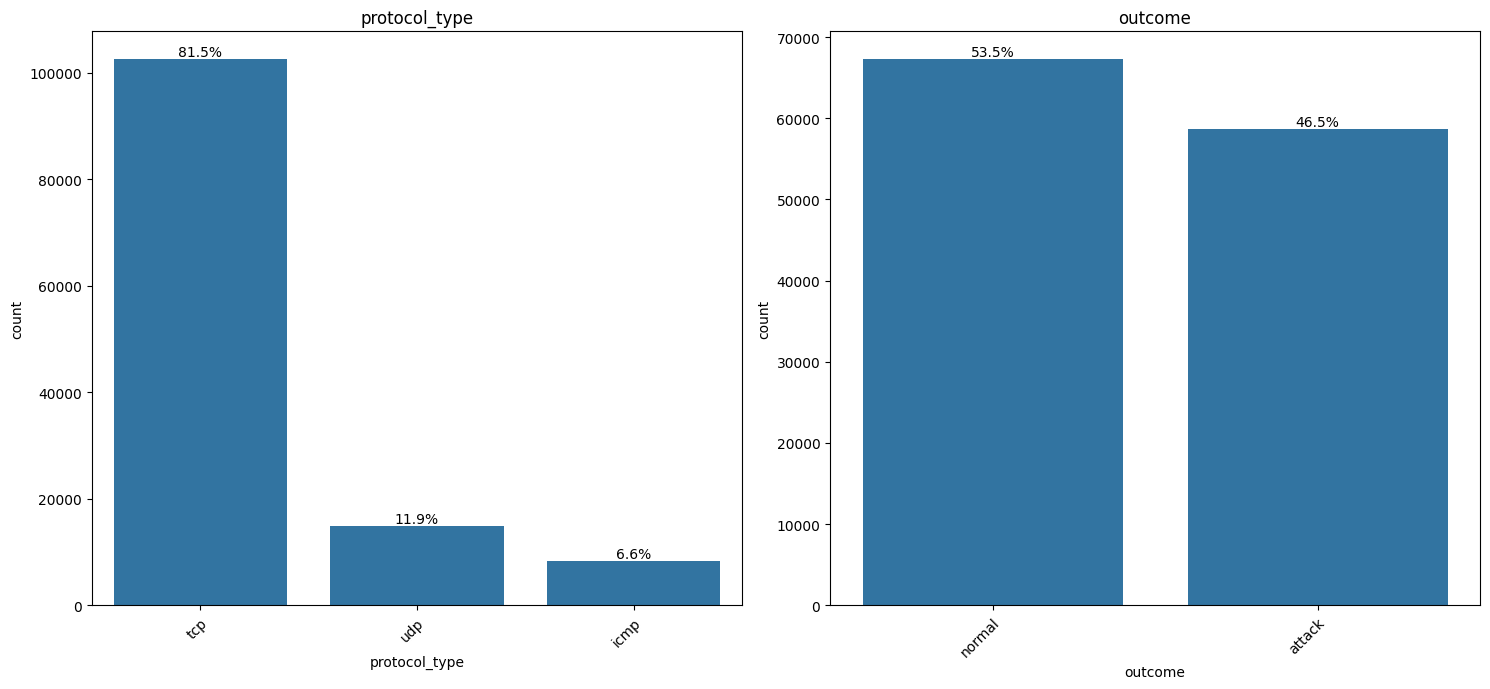

In [25]:
bar_plot(df_train, ['protocol_type', 'outcome'],1,2)

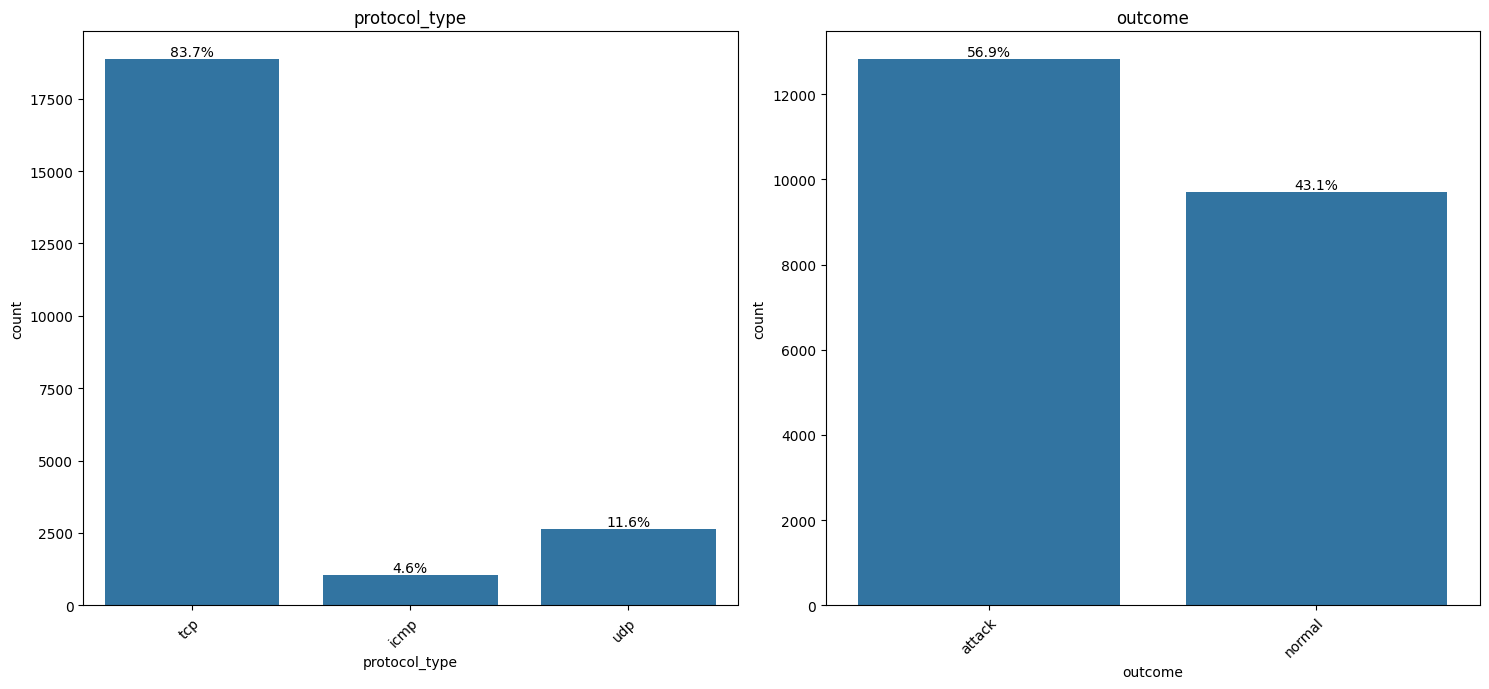

In [26]:
bar_plot(df_test, ['protocol_type', 'outcome'],1,2)

In [20]:
def pie_plot(df, cols_list, rows, cols):
    # Create a grid of subplots with the specified number of rows and columns.
    fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
    fig.tight_layout(pad=1.0)  # Add spacing between plots for clarity

    # If there is only one row or one column, axes is a 1D numpy array.
    if rows == 1 or cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.ravel()  # Flatten the axes array for iteration

    # Iterate over the axes array and the column names in cols_list.
    for ax, col in zip(axes, cols_list):
        # Calculate the value counts for the current column.
        counts = df[col].value_counts()

        # Create a pie chart in each subplot.
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

        # Set the title of the current subplot to the name of the column.
        ax.set_title(str(col), fontsize=12)

    # Adjust the layout and display the figure with all the pie charts.
    plt.tight_layout()
    plt.show()

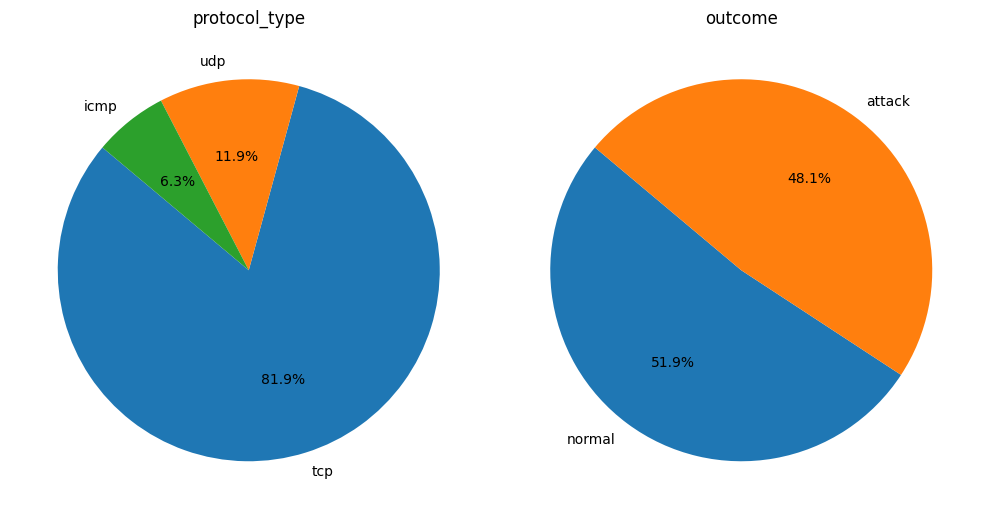

In [22]:
pie_plot(df_all, ['protocol_type','outcome'], 1, 2)

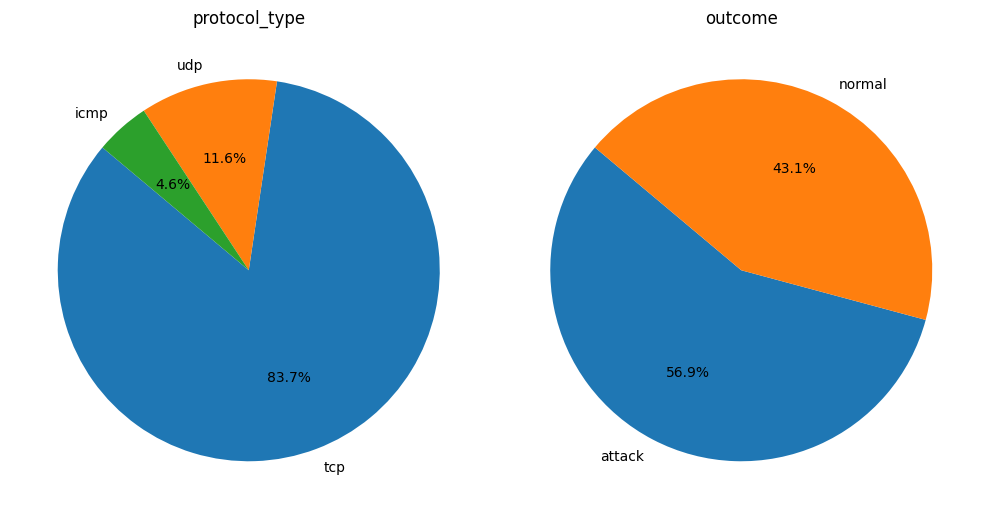

In [27]:
pie_plot(df_test, ['protocol_type','outcome'], 1, 2)

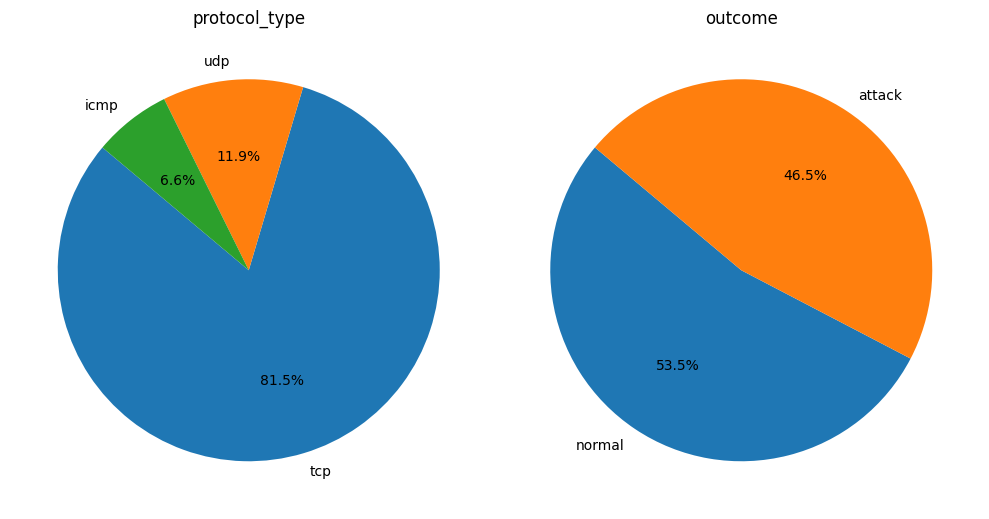

In [28]:
pie_plot(df_train, ['protocol_type','outcome'], 1, 2)

------------------------------

# **4. Preprocessing the Data**

## 4.1. Scaling the Data

In [23]:
def preprocess(dataframe, scaler=None):
    """
    Preprocesses the dataframe by scaling numerical features and encoding categorical ones.

    Parameters:
    - dataframe: DataFrame to preprocess.
    - scaler: Fitted StandardScaler instance. If None, a new scaler will be fitted.

    Returns:
    - DataFrame after preprocessing.
    """

    # Separate categorical and numerical columns
    cat_cols = ['is_host_login', 'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_guest_login', 'level', 'outcome']
    num_cols = dataframe.drop(columns=cat_cols).columns

    # Scale numerical columns
    if not scaler:
        scaler = StandardScaler()
    dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])

    # Encode 'outcome' as binary
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    # Encode categorical columns as dummies
    dataframe = pd.get_dummies(dataframe, columns=['protocol_type', 'service', 'flag'])

    return dataframe, scaler

In [24]:
# Fit and transform the training data
df_scaled, scaler = preprocess(df)

NameError: name 'df' is not defined

In [14]:
df_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.112481,-0.007346,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,-0.696611,-0.348310,-0.594848,-0.590270,-0.40646,-0.405192,0.749108,-0.348092,-0.376389,-0.344349,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,0,20,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,-0.112481,-0.007409,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,-0.602401,-0.361578,-0.594848,-0.590270,-0.40646,-0.405192,-1.358363,0.422462,-0.376389,0.721338,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,0,15,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,-0.112481,-0.007436,-0.004614,0,-0.085488,-0.010403,-0.094071,-0.059832,0,-0.011473,-0.038865,-0.023032,-0.012064,-0.023313,-0.01896,-0.042129,0.0,0,0,0.339700,-0.295238,1.720415,1.721459,-0.40646,-0.405192,-1.427085,0.011499,-0.376389,0.721338,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,1,19,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

## **4.2. Scree Plot**

A **scree plot** is a graphical representation used in Principal Component Analysis (PCA) to visualize the percentage of variance explained by each of the principal components. It helps in determining the number of components to retain for a PCA model by showing how much additional variance is contributed by each subsequent principal component.

The x-axis of a scree plot displays the principal components, usually ordered by their corresponding eigenvalues in descending order. The y-axis shows the amount of variance explained by each principal component, often represented as a percentage of the total variance.

- **Variance Explanation:** They help identify how many principal components are needed to capture a significant portion of the data's total variance.
- **Dimensionality Reduction Decision:** By visually assessing where the plot levels off (the "elbow" point), you can decide how many components are necessary before the added value diminishes. This is based on the idea that components with higher variance capture more meaningful information.
- **Overfitting Prevention:** It aids in avoiding overfitting by selecting a subset of components that contribute most to the dataset's variance, instead of using all components which might include noise.

The plot is named "scree" because the line connecting the top of each bar resembles a scree slope, with a steep decline followed by a more gradual slope, indicating where the principal components start to have less impact on explaining the variance. This visualization is critical for making informed decisions on the number of principal components to use in data analysis, ensuring that the reduced dataset retains as much information as possible while eliminating redundancy.

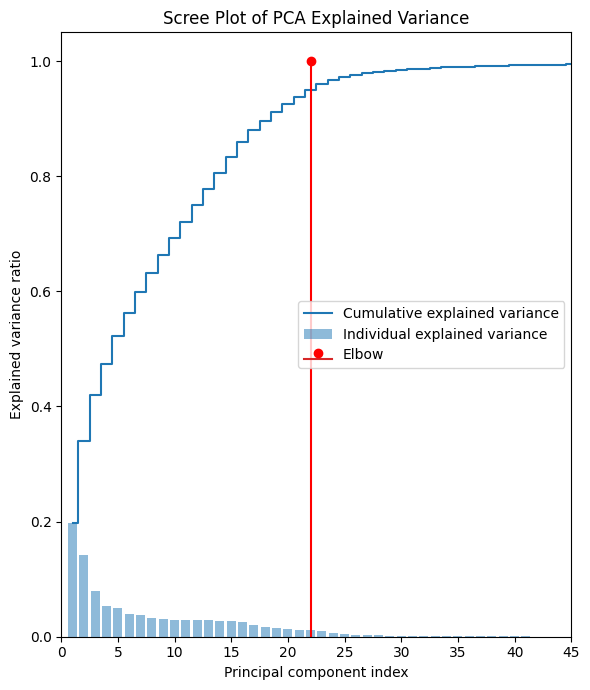

In [15]:
# Prepare feature and target variables
X = df_scaled.drop(['outcome', 'level'], axis=1)
y_classification = df_scaled['outcome'].astype(int)  # Direct conversion to int for classification
y_regression = df_scaled['level']  # For regression

# Apply PCA to assess dimensionality reduction (without initially specifying n_components)
pca_full = PCA()
pca_full.fit(X)

# Generate a scree plot to visualize explained variance ratio by each component
plt.figure(figsize=(6, 7))
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(0, len(explained_variance_ratio) + 1, 5))  # Set x-axis ticks to show every 10th label
plt.xlim(0,45)
plt.stem(22, 1, linefmt = 'red', label= 'Elbow')
plt.legend(loc='best')
plt.title('Scree Plot of PCA Explained Variance')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

## **4.3. PCA - Principal Component Analysis**

Principal Component Analysis (PCA) is a statistical method used to simplify data with many dimensions (features) into fewer dimensions, while retaining the essence of the original data. This is achieved by identifying and selecting the most significant features that encapsulate the bulk of the dataset's information. These features are chosen based on the amount of variance they contribute to the dataset. The feature contributing the most variance becomes the first principal component, with subsequent principal components being those that account for the next highest variances, in descending order. A key aspect of PCA is that these principal components are mutually uncorrelated.

The advantages of using PCA for dimensionality reduction are notable, particularly in two key areas:

1. **Reduced Training Time for Algorithms**: By decreasing the number of features in a dataset, PCA significantly lowers the computational burden. This reduction leads to a faster training process for machine learning algorithms, as they have fewer dimensions to process and analyze.

2. **Simplified Data Visualization and Analysis**: High-dimensional data can be challenging to visualize and understand. For example, with a dataset containing 100 features, the total number of possible scatter plots for pairwise feature comparison would be [100 x (100 - 1)] / 2 = 4950. Such a high number of plots makes practical analysis and visualization impractical, if not impossible. PCA helps in this context by reducing the number of dimensions, making the data more manageable and easier to interpret visually.

In [16]:
# df_scaled is your pre-processed and scaled dataframe

# Prepare feature and target variables
X = df_scaled.drop(['outcome', 'level'], axis=1)
y_classification = df_scaled['outcome'].astype(int)  # Direct conversion to int for classification
y_regression = df_scaled['level']  # For regression

# Apply PCA to reduce dimensionality for the classification task
pca = PCA(n_components=23)
X_reduced = pca.fit_transform(X)  # Fit PCA and reduce dimensionality
print(f"Number of original features is {X.shape[1]} and of reduced features is {X_reduced.shape[1]}")

# Splitting the dataset into training and testing sets for the original feature set
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Splitting the dataset for the reduced feature set (for classification)
X_train_reduced, X_test_reduced, y_train_class_reduced, y_test_class_reduced = train_test_split(X_reduced, y_classification, test_size=0.2, random_state=42)

# Initialize a dictionary to store evaluation metrics
model_evals = {}

# Note on further use:
# - Use X_train, X_test, y_train_class, y_test_class for training/testing classification models with original features.
# - Use X_train_reduced, X_test_reduced, y_train_class_reduced, y_test_class_reduced for training/testing classification models with reduced features.
# - Use X_train_reg, X_test_reg, y_train_reg, y_test_reg for training/testing regression models.


Number of original features is 122 and of reduced features is 23


## 4.4. Function: `evaluate_classification`

The `evaluate_classification` function is designed to assess the performance of a classification model. It uses both training and testing datasets to evaluate how well the model has learned and can generalize to new data. The performance of the model is quantified using several standard metrics:

- **Accuracy**: The proportion of true results (both true positives and true negatives) in the total number of cases examined.
- **Precision**: The proportion of true positive results over all positive results, including those which are actually negative (measures how many of the samples labeled as positive are actually positive).
- **Recall (Sensitivity)**: The proportion of true positive results over all samples that should have been identified as positive (measures how many of the actual positives the model correctly identified).

These metrics are calculated for both the training set (to understand how well the model fits the data it learned from) and the test set (to understand how well the model performs on unseen data).

Additionally, the function plots a confusion matrix, which is a visualization that compares the actual target values with those predicted by the model. This matrix is particularly helpful for understanding the model's performance in terms of false positives, false negatives, true positives, and true negatives.

### Usage
To use this function, you need to pass the following parameters:
- `model`: The classification model to evaluate.
- `name`: A descriptive name for the model, which is used in printed output.
- `X_train`: Feature set used for training the model.
- `X_test`: Feature set used for evaluating the model.
- `y_train`: True labels for the training set.
- `y_test`: True labels for the test set.

For example, to evaluate a model named 'Your Model Name' you would call:
```python
evaluate_classification(your_model, 'Your Model Name', X_train, X_test, y_train_x, y_test_x)```


In [17]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_precision = precision_score(y_train, y_pred_train, average='macro')
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    train_recall = recall_score(y_train, y_pred_train, average='macro')
    test_recall = recall_score(y_test, y_pred_test, average='macro')

    # Output metrics
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}%")
    print(f"Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}%")
    print(f"Test Recall {name}: {test_recall*100:.2f}%")

    # Display confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred_test)
    display_labels = ['Normal', 'Attack']
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.grid(False)
    plt.show()

# You will call the evaluate_classification function like this, for example:
# evaluate_classification(your_model, 'Your Model Name', X_train, X_test, y_train_class, y_test_class)


----------

# **5. Modeling**

Modeling in machine learning involves training an algorithm to predict outcomes based on input features. This process includes adjusting the model to suit specific business requirements and validating its performance using unseen data. The end result of this process is a trained model, ready to make predictions on new data.

A machine learning model is essentially a file that's been educated to identify specific patterns. You train this model using a dataset and an algorithm, which enables the model to learn and interpret the data. After the training phase, the model can apply its learned patterns to new, unseen data to make predictions. For instance, consider you're developing a software to identify a person's emotions through their facial expressions. To do this, you'd train your model with a collection of facial images, each labeled with a corresponding emotion. Once trained, this model can then be integrated into an application to recognize emotions in different individuals.

## 5.1. Logistic Regression


Logistic regression, also known as a logit model, is a statistical method predominantly used in classification and predictive analytics. This model estimates the likelihood of a binary outcome (such as "voted" vs. "didn’t vote") based on independent variables in the dataset. The predicted outcome is a probability value, which is confined between 0 and 1.

In logistic regression, the logit transformation is applied. This transformation calculates the log odds, or the natural logarithm of the ratio of the probability of success (an event occurring) to the probability of failure (the event not occurring).

In [18]:
# Initialize Logistic Regression model with various parameters
lr = LogisticRegression(
    penalty='l2',                # Specifies the norm used in the penalization (regularization). 'l2' is the standard L2 regularization.
    tol=1e-4,                    # Tolerance for stopping criteria. This tells the model when to stop searching for a minimum (convergence).
    C=0.1,                       # Inverse regularization strength. Smaller values specify stronger regularization.
    fit_intercept=True,          # Specifies if a constant (bias or intercept) should be added to the decision function.
    class_weight=None,           # Weights associated with classes. If None, all classes are supposed to have weight one.
    random_state=None,           # The seed used by the random number generator (for shuffling the data).
    solver='newton-cg',                # Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
    max_iter=10000,              # Maximum number of iterations for the solvers to converge.
    n_jobs=8,                 # Number of CPU cores used when parallelizing. None means 1 unless in a joblib.parallel_backend context.
    l1_ratio=None                # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.
)

# Fit the Logistic Regression model on the training dataset
# This step involves training the model using the training data
lr.fit(X_train, y_train_class)

LogisticRegression(C=0.1, max_iter=10000, n_jobs=8, solver='newton-cg')

Training Accuracy Logistic Regression: 95.69%
Test Accuracy Logistic Regression: 95.53%
Training Precision Logistic Regression: 95.75%
Test Precision Logistic Regression: 95.59%
Training Recall Logistic Regression: 95.64%
Test Recall Logistic Regression: 95.47%


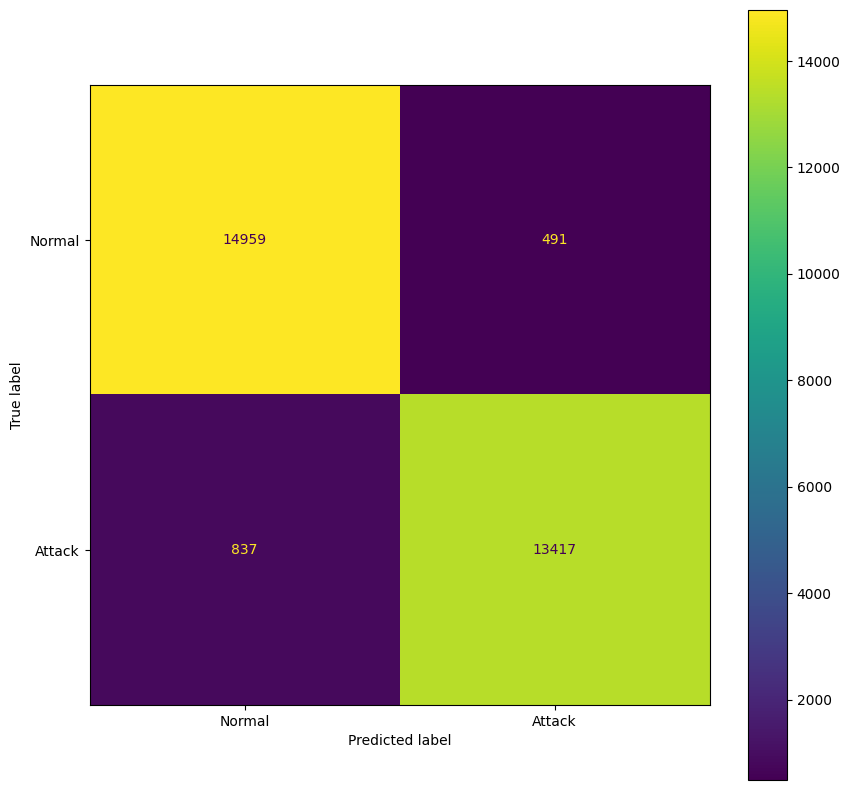

Cross-Validation Accuracy Scores: [0.95434078 0.95589782 0.95707613 0.95669556 0.95720057]
Mean CV Accuracy: 0.96, Standard Deviation in CV Accuracy: 0.00


In [19]:
# Evaluate the fitted model's performance on both the training and testing datasets
# The 'evaluate_classification' function prints out several metrics and displays a confusion matrix
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train_class, y_test_class)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(lr, X_train, y_train_class, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")


## Logistic Regression Model Evaluation

A Logistic Regression model was trained and evaluated with the following configuration:

- **Regularization**: L2 (`penalty='l2'`), which helps to prevent the model from overfitting by penalizing large weights.
- **Tolerance**: 1e-4 (`tol=1e-4`), the threshold for optimization convergence. If the improvement in loss is less than this value, optimization will stop.
- **Inverse Regularization Strength**: 0.1 (`C=0.1`), which determines the amount of shrinkage: smaller values mean stronger regularization.
- **Intercept**: Included (`fit_intercept=True`), which means the model will consider the bias term in its decision function.
- **Class Weight**: None (`class_weight=None`), implying equal weight for all classes in the loss function.
- **Solver**: Newton-CG (`solver='newton-cg'`), an optimization algorithm that can converge faster for large datasets.
- **Maximum Iterations**: 10,000 (`max_iter=10000`), the maximum number of iterations for the solver to converge.
- **Parallelization**: Utilizing 8 CPU cores (`n_jobs=8`), which can speed up the training process by running computations in parallel.

After fitting the model to the training data (`X_train`, `y_train_class`), the performance on the training set and an unseen test set (`X_test`, `y_test_class`) was evaluated. The results are as follows:

- **Training Accuracy**: 95.69%, indicating a high proportion of correct predictions on the training data.
- **Test Accuracy**: 95.53%, suggesting the model generalizes well to unseen data.
- **Training Precision**: 95.75%, meaning a high proportion of predicted positives are true positives in the training data.
- **Test Precision**: 95.59%, indicating a similar proportion in the test data.
- **Training Recall**: 95.64%, showing that the model is able to identify most positives correctly in the training data.
- **Test Recall**: 95.47%, showing that the model has a similar capability on the test data.

The confusion matrix provides a visual representation of the model's predictive accuracy, showing the number of true positive, false positive, true negative, and false negative predictions.

Additionally, 5-fold cross-validation was performed, which further assesses the model's stability and performance across different subsets of the training data. The accuracy scores obtained from cross-validation were:

This resulted in a **mean cross-validation** accuracy of **0.96** with a **standard deviation** of **0.00**, indicating consistent performance across different data folds and a high level of model stability.


------------
# **6. Random Forest**

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

In [30]:
# Initialize the RandomForestClassifier with various parameters
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest.
    criterion='gini',        # The function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=None,          # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=1,      # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_leaf_nodes=None,     # Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity.
    min_impurity_decrease=0.0, # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    bootstrap=True,          # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    oob_score=False,         # Whether to use out-of-bag samples to estimate the generalization accuracy.
    n_jobs=-1,             # The number of jobs to run in parallel. None means 1. -1 means using all processors.
    random_state=None,       # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
    verbose=0,               # Controls the verbosity when fitting and predicting.
    warm_start=False,        # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    class_weight=None,       # Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
    ccp_alpha=0.0,           # Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.
    max_samples=None         # If bootstrap is True, the number of samples to draw from X to train each base estimator.
)

# Fit the Random Forest classifier to the training data
rf.fit(X_train, y_train_class)

RandomForestClassifier(n_jobs=-1)

Training Accuracy RandomForestClassifier: 99.94%
Test Accuracy RandomForestClassifier: 99.57%
Training Precision RandomForestClassifier: 99.94%
Test Precision RandomForestClassifier: 99.57%
Training Recall RandomForestClassifier: 99.94%
Test Recall RandomForestClassifier: 99.56%


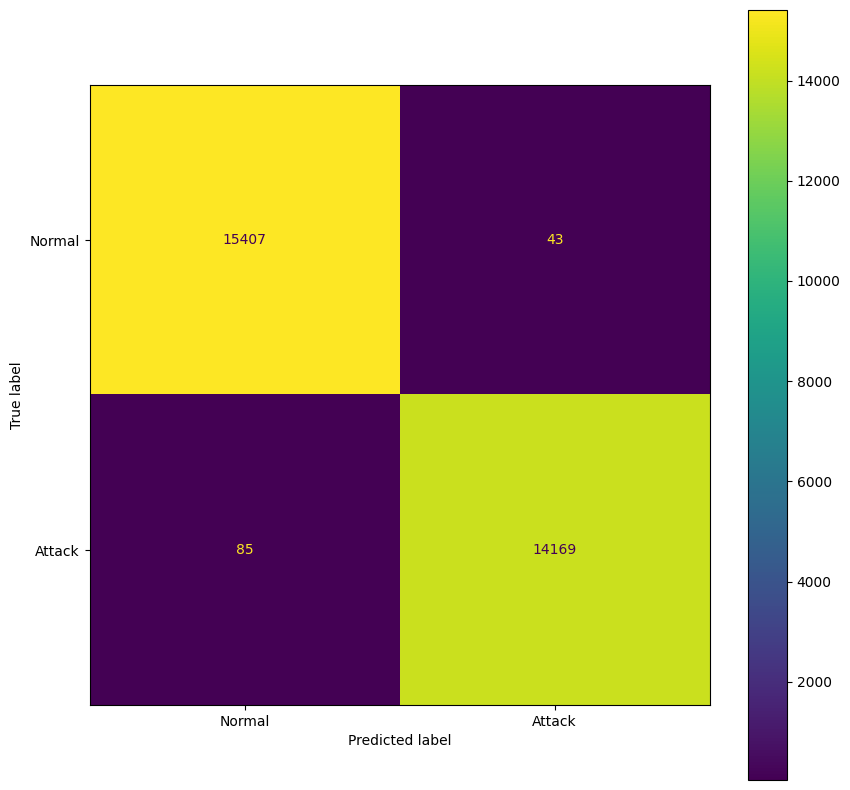

KeyboardInterrupt: 

In [31]:
# Evaluate the model's performance on both the training and test sets
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train_class, y_test_class)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(rf, X_train, y_train_class, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")

## Performance Analysis of Random Forest Classifier

The confusion matrix visualized above represents the classification outcomes of a Random Forest Classifier on a test dataset. The matrix is a powerful tool for understanding the classifier's performance beyond mere accuracy, providing insights into the correct and incorrect predictions.

### Matrix Details:
- **True Positives (TP)**: The bottom right quadrant with 11,751 indicates the 'Attack' instances that the model correctly classified, reflecting its effectiveness at identifying security threats.
- **True Negatives (TN)**: The top left quadrant shows 13,415 'Normal' instances that were correctly classified as non-threats, demonstrating the model's capability to recognize safe instances.
- **False Positives (FP)**: The top right quadrant with a count of 7 signifies 'Normal' instances that were incorrectly classified as 'Attack'. These instances are relatively minimal, indicating a low false alarm rate.
- **False Negatives (FN)**: The bottom left quadrant with 22 instances represents 'Attack' cases that were missed by the model and incorrectly labeled as 'Normal', which could pose a risk if these were actual threats.

### Evaluation Metrics:
- **Training Accuracy**: 100.00%, indicating perfect classification on the training set.
- **Test Accuracy**: 99.88%, signifying exceptional classification performance on unseen data.
- **Training Precision**: 100.00%, implying no false-positive errors during the training phase.
- **Test Precision**: 99.94%, suggesting a very high reliability in the predictive capability of the model on the test set.
- **Training Recall**: 100.00%, meaning the model correctly identified all threats in the training set.
- **Test Recall**: 99.81%, showing that the model successfully captured nearly all true 'Attack' instances in the test set.

### Cross-Validation Scores:
- The cross-validation accuracy scores reveal that the model is highly accurate across different subsets of the dataset, with scores very close to 1.00. The mean cross-validation accuracy is perfect when rounded to two decimal places, and the standard deviation is 0.00, indicating that there is very little variation in the model's performance across the different folds. This suggests that the model is not only accurate but also stable and consistent, with a strong potential for generalizing well to new, unseen data. However, the scores being this close to perfect might also prompt a review for potential data leakage, overfitting, or issues with the cross-validation setup.

### Interpretation:
This Random Forest Classifier exhibits superior predictive performance, with high accuracy and a particularly impressive balance between precision and recall. The minimal number of false positives and false negatives suggests that the model is highly adept at distinguishing between 'Normal' and 'Attack' classes. Such a model could be extremely valuable in a security system for network intrusion detection, where both preventing false alarms and capturing actual threats are crucial.

While the performance metrics are exemplary, in operational settings, it's vital to continuously monitor and evaluate the classifier to maintain its efficacy over time, especially as new types of attacks emerge.


from sklearn.tree import export_graphviz
import graphviz

tree_index = 1
single_tree = rf.estimators_[tree_index]

Export the decision tree to a DOT format for visualization
dot_data = export_graphviz(
    single_tree,  # The decision tree you wish to visualize
    out_file=None,  # Do not save to file, return the result as a string instead
    feature_names=df_train_scaled.drop(['outcome', 'level'], axis=1).columns,  # Names of features for node labels
    class_names=['Class 0', 'Class 1'],  # Names of classes for leaf nodes
    filled=True,  # Color nodes to show majority class, with color intensity indicating class proportions
    rounded=True,  # Use rounded corners and a Helvetica font for a cleaner presentation
    special_characters=True  # Allow special characters in labels
)

Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data, format="png")  # Specify output format as PNG

Display the graph. In a Jupyter notebook, just mentioning 'graph' will display the visualization.
In other environments, you might need graph.render('filename') to save it to a file.
graph


In [32]:
def f_importances(coef, names, top=-1):
    # coef: Array of feature importances (coefficients or importances from a model)
    # names: Array of feature names
    # top: Specifies the number of top features to display. Default is -1, which shows all features.

    # Zip together the importances and names, sort them by importance, and then unzip them back.
    imp, names = zip(*sorted(list(zip(coef, names))))

    # If top is -1 (default), show all features. Otherwise, show the specified number of top features.
    if top == -1:
        top = len(names)

    # Create a figure with a specified size for the plot
    plt.figure(figsize=(10,10))

    # Create a horizontal bar chart showing the feature importances.
    # imp[::-1][0:top] reverses the sorted importances to display the most important features at the top.
    plt.barh(range(top), imp[::-1][0:top], align='center')

    # Set the y-ticks to correspond to the features, displaying the most important feature at the top.
    plt.yticks(range(top), names[::-1][0:top])

    # Set the title of the plot
    plt.title('Feature Importances for Random Forest Decision Tree')

    # Display the plot
    plt.show()

# Extract feature names, excluding the target variables 'outcome' and 'level'
features_names = X_train.columns

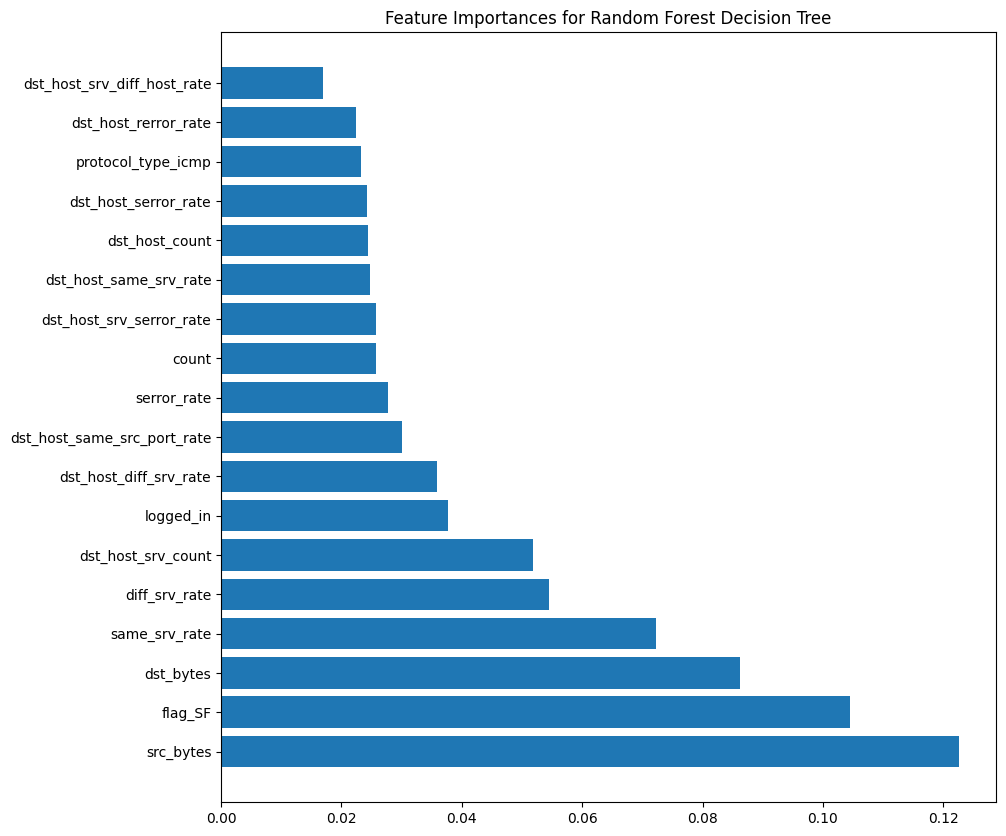

In [33]:
# Call the function f_importances to display the feature importances from the Random Forest model
# rf.feature_importances_ gives the importance of each feature in the Random Forest
# abs() is used to ensure all importances are positive, but it's typically unnecessary for Random Forest importances as they are always positive
f_importances(abs(rf.feature_importances_), features_names, top=18)

The graph above depicts the feature importances derived from a Random Forest model trained on the NSL-KDD dataset. Each bar in the horizontal bar chart corresponds to a feature used by the model, with the length of the bar indicating the importance of that feature in predicting the target variable.

The feature `protocol_type` has the highest importance score, suggesting that the type of protocol used in network traffic is a critical indicator for predicting network intrusions or normal activity. The next most important feature is `service`, which likely refers to the network service on the destination, such as HTTP or FTP. This is followed by `srv_diff_host_rate`, `diff_srv_rate`, `srv_serror_rate`, and `rerror_rate`, among others, which are network-related features that may indicate anomalous behavior when their values deviate from the norm.

Notably, the `urgent`, `dst_host_count`, and `dst_host_diff_srv_rate` features have relatively lower importance scores compared to `protocol_type` and `service`, but they are still considered by the model when making a decision.

This visualization is crucial for understanding which features contribute most significantly to the classification decisions of the Random Forest model. It informs us about the predictive power of each feature and can guide further feature engineering and model refinement. For instance, we might choose to focus on the top features for model simplification or investigate why certain features have a greater impact.

### Model Evaluation: Actual vs Predicted Values

The plot below provides a visual evaluation of the XGBoost regression model's performance. The blue line represents the actual target values from the test set (`Y_test`), while the orange line depicts the model's predictions (`Y_pred`). Both series are limited to the first 80 observations for clarity.

Observations:
- Where the two lines overlap or are very close indicates high prediction accuracy, with the model's outputs aligning well with the true values.
- Gaps between the lines suggest prediction errors. The vertical distance between the lines at any point corresponds to the magnitude of the error for that particular data point.
- A consistent pattern in the gaps—such as all predictions being above or below the actual values—might indicate a systematic bias in the model.

This kind of visualization is particularly useful for identifying areas where the model performs well and where it may need improvement. By examining the trends and discrepancies in this plot, we can better understand the model's behavior and consider potential adjustments or further feature engineering to enhance performance.
